In [1]:
import numpy as np
import pandas as pd 
import datetime as dt 
import tushare as ts 

In [4]:
import matplotlib.pyplot as plt 
import sklearn as sk 
import scipy as sp 
import baostock as bs 
import seaborn as sns 
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS']  # Mac常用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# 设置你的 token
ts.set_token('fe8102bf83f5f83f6608aa46fa5e985c534c227786236a1192e5fd55')  # 替换为你的token
pro = ts.pro_api()

In [11]:
# 获取南京港（002040.SZ）的历史行情数据
df = pro.daily(ts_code='601022.SH', start_date='20230101', end_date='20250613')
# 将日期设置为索引并排序
df['trade_date'] = pd.to_datetime(df['trade_date'])
df.set_index('trade_date', inplace=True)
df.sort_index(inplace=True)

# 显示前几行
print(df.head())

              ts_code  open  high   low  close  pre_close  change  pct_chg  \
trade_date                                                                   
2023-01-03  601022.SH 13.53 13.85 13.23  13.83      13.50    0.33     2.44   
2023-01-04  601022.SH 13.66 13.70 13.18  13.34      13.83   -0.49    -3.54   
2023-01-05  601022.SH 13.24 14.43 13.20  13.96      13.34    0.62     4.65   
2023-01-06  601022.SH 13.77 13.77 13.40  13.46      13.96   -0.50    -3.58   
2023-01-09  601022.SH 13.46 13.60 13.34  13.58      13.46    0.12     0.89   

                 vol    amount  
trade_date                      
2023-01-03 257354.69 350550.32  
2023-01-04 227456.76 304786.93  
2023-01-05 396679.76 549729.20  
2023-01-06 259655.81 351612.57  
2023-01-09 174955.96 235751.83  


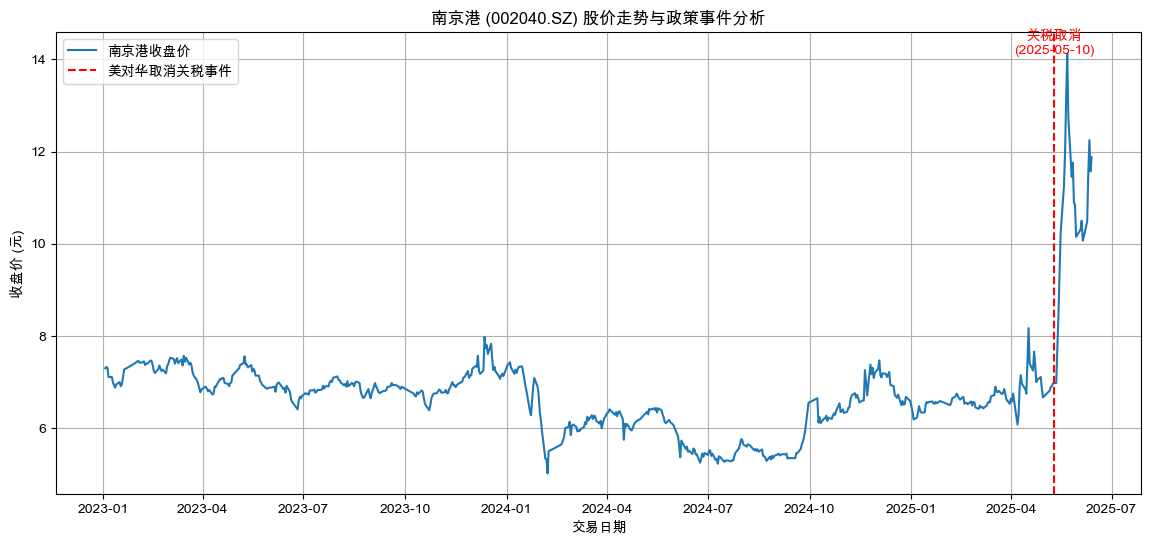

In [7]:
# 可视化收盘价
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x=df.index, y='close', label='南京港收盘价')

# 添加竖线标注事件时间
event_date = '2025-05-10'
plt.axvline(pd.to_datetime(event_date), color='r', linestyle='--', label='美对华取消关税事件')

# 添加文本说明
plt.text(pd.to_datetime(event_date), df['close'].max(), '关税取消\n(2025-05-10)', ha='center', fontsize=10, color='red')

# 标题和标签
plt.title('南京港 (002040.SZ) 股价走势与政策事件分析')
plt.xlabel('交易日期')
plt.ylabel('收盘价 (元)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
before_event = df.loc[:'2025-05-09']['close'].iloc[-1]
after_event = df.loc['2025-05-10':]['close'].iloc[0]
change = ((after_event - before_event) / before_event) * 100
print(f"事件后首个交易日涨幅: {change:.2f}%")

事件后首个交易日涨幅: 0.14%


In [12]:
index_df = pro.index_daily(ts_code='399300.SZ', start_date='20230101', end_date='20250613')
index_df['trade_date'] = pd.to_datetime(index_df['trade_date'])
index_df.set_index('trade_date', inplace=True)
index_df.sort_index(inplace=True)

# 合并数据
compare_df = pd.merge(df[['close']], index_df[['close']], left_index=True, right_index=True, suffixes=('_stock', '_index'))


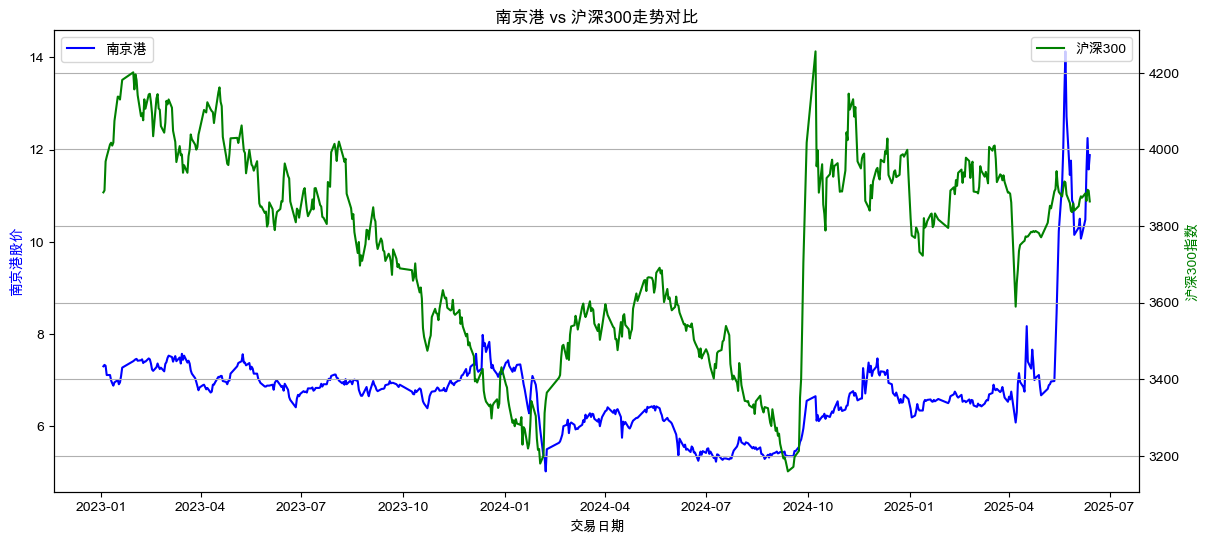

In [9]:
# 绘制双轴图
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

sns.lineplot(data=compare_df, x=compare_df.index, y='close_stock', ax=ax1, color='blue', label='南京港')
sns.lineplot(data=compare_df, x=compare_df.index, y='close_index', ax=ax2, color='green', label='沪深300')

plt.title("南京港 vs 沪深300走势对比")
ax1.set_xlabel('交易日期')
ax1.set_ylabel('南京港股价', color='blue')
ax2.set_ylabel('沪深300指数', color='green')
plt.legend()
plt.grid(True)
plt.show()

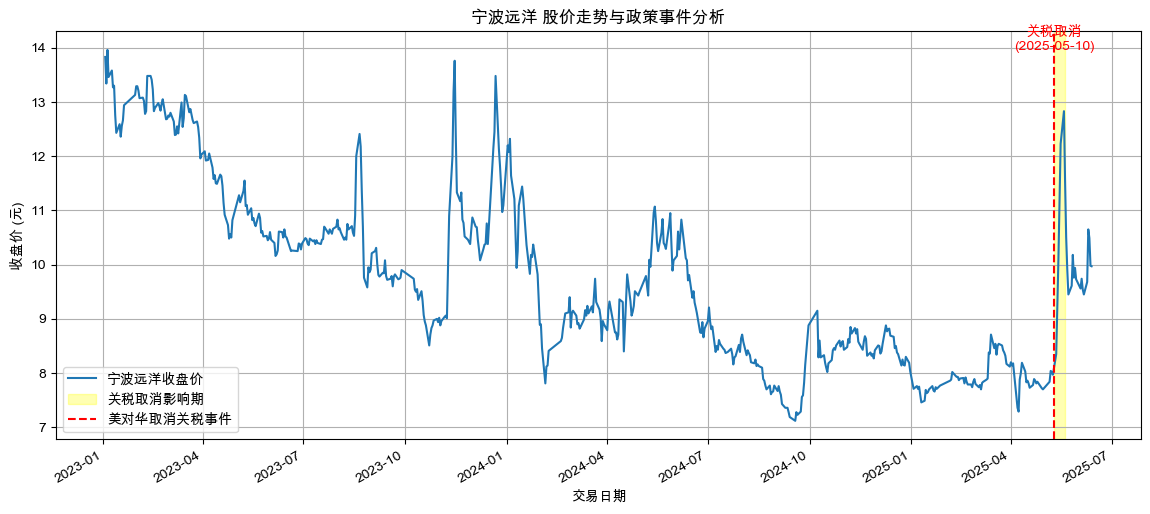

In [13]:
# 可视化收盘价
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x=df.index, y='close', label='宁波远洋收盘价')

# 添加黄色背景区域（2025年5月10日 ~ 2025年5月20日）
plt.axvspan(pd.to_datetime('2025-05-10'), pd.to_datetime('2025-05-20'),
            color='yellow', alpha=0.3, label='关税取消影响期')

# 添加竖线标注事件时间
event_date = '2025-05-10'
plt.axvline(pd.to_datetime(event_date), color='r', linestyle='--', label='美对华取消关税事件')

# 添加文本说明
plt.text(pd.to_datetime(event_date), df['close'].max(), '关税取消\n(2025-05-10)', ha='center', fontsize=10, color='red')

# 标题和标签
plt.title('宁波远洋 股价走势与政策事件分析')
plt.xlabel('交易日期')
plt.ylabel('收盘价 (元)')
plt.legend()
plt.grid(True)

# 自动调整日期格式
plt.gcf().autofmt_xdate()

plt.show()

In [17]:
stocks_names=pd.read_excel('csi20250613.xls',sheet_name='个股数据',engine='xlrd')

In [18]:
stocks_names.head()

,证券代码,证券名称,一级行业代码,一级行业名称,二级行业代码,二级行业名称,三级行业代码,三级行业名称,四级行业代码,四级行业名称,个股静态市盈率,个股滚动市盈率,个股市净率,个股股息率
0,1,平安银行,40,金融,4010,银行,401010,商业银行,40101010,综合性银行,5.05,5.15,0.44,8.33
1,2,万科A,60,房地产,6010,房地产,601010,房地产开发与园区,60101010,房地产开发,-,-,0.39,-
2,4,*ST国华,45,信息技术,4510,计算机,451010,软件开发,45101010,通用软件,-,-,23.54,-
3,6,深振业A,60,房地产,6010,房地产,601010,房地产开发与园区,60101010,房地产开发,-,-,1.72,-
4,7,全新好,60,房地产,6010,房地产,601020,房地产管理与服务,60102010,房地产管理,48.75,47.80,15.20,-


In [80]:
# 筛选四级行业名称为“港口”的数据
ports_df = stocks_names[stocks_names['三级行业名称'] == '石油与天然气']

# 查看筛选后的数据
print(ports_df)

        证券代码   证券名称  一级行业代码 一级行业名称  二级行业代码 二级行业名称  三级行业代码  三级行业名称    四级行业代码  \
37        59   华锦股份      10     能源    1010     能源  101020  石油与天然气  10102020   
51        96   广聚能源      10     能源    1010     能源  101020  石油与天然气  10102040   
60       159   国际实业      10     能源    1010     能源  101020  石油与天然气  10102040   
131      554   泰山石油      10     能源    1010     能源  101020  石油与天然气  10102040   
226      703   恒逸石化      10     能源    1010     能源  101020  石油与天然气  10102020   
397      968   蓝焰控股      10     能源    1010     能源  101020  石油与天然气  10102030   
488     1331   胜通能源      10     能源    1010     能源  101020  石油与天然气  10102040   
729     2221   东华能源      10     能源    1010     能源  101020  石油与天然气  10102040   
1662  300191   潜能恒信      10     能源    1010     能源  101020  石油与天然气  10102020   
1936  300483   首华燃气      10     能源    1010     能源  101020  石油与天然气  10102030   
2275  300839   博汇股份      10     能源    1010     能源  101020  石油与天然气  10102020   
2904  600028   中国石化      10     能源    1010     能源  1

In [81]:
# 提取证券代码和证券名称
ports_stocks = ports_df[['证券代码', '证券名称']]
print("\n证券代码和证券名称：")
print(ports_stocks)


证券代码和证券名称：
        证券代码   证券名称
37        59   华锦股份
51        96   广聚能源
60       159   国际实业
131      554   泰山石油
226      703   恒逸石化
397      968   蓝焰控股
488     1331   胜通能源
729     2221   东华能源
1662  300191   潜能恒信
1936  300483   首华燃气
2275  300839   博汇股份
2904  600028   中国石化
3076  600256   广汇能源
3176  600387  *ST海越
3404  600688   上海石化
3467  600759   洲际油气
3481  600777   ST新潮
3600  600938   中国海油
3815  601857   中国石油
4055  603223   恒通股份
4146  603353   和顺石油
4176  603393   新天然气
4259  603619   中曼石油
5246  834014    特瑞斯


In [82]:
# 获取历史数据
all_data = {}
for _, row in ports_stocks.iterrows():
    code = f"{row['证券代码']}.SH"
    try:
        df = pro.daily(ts_code=code, start_date='20250101', end_date='20250613')
        df['trade_date'] = pd.to_datetime(df['trade_date'])
        df.set_index('trade_date', inplace=True)
        df = df[['close']].rename(columns={'close': row['证券名称']})
        all_data[row['证券名称']] = df
        print(f"{row['证券名称']} 数据获取完成")
    except Exception as e:
        print(f"获取 {row['证券名称']} 数据失败: {e}")

# 合并所有股票的收盘价
price_df = pd.concat(all_data.values(), axis=1)

华锦股份 数据获取完成
广聚能源 数据获取完成
国际实业 数据获取完成
泰山石油 数据获取完成
恒逸石化 数据获取完成
蓝焰控股 数据获取完成
胜通能源 数据获取完成
东华能源 数据获取完成
潜能恒信 数据获取完成
首华燃气 数据获取完成
博汇股份 数据获取完成
中国石化 数据获取完成
广汇能源 数据获取完成
*ST海越 数据获取完成
上海石化 数据获取完成
洲际油气 数据获取完成
ST新潮 数据获取完成
中国海油 数据获取完成
中国石油 数据获取完成
恒通股份 数据获取完成
和顺石油 数据获取完成
新天然气 数据获取完成
中曼石油 数据获取完成
特瑞斯 数据获取完成


In [78]:
price_df.head()

,凤凰航运,盛航股份,海峡股份,中远海能,安通控股,中远海特,海航科技,宁波海运,宁波远洋,锦江航运,招商轮船,中远海控,招商南油,海通发展,渤海轮渡,兴通股份,中谷物流,国航远洋
trade_date,,,,,,,,,,,,,,,,,,
2024-01-02,NaN,NaN,NaN,12.79,2.52,5.48,2.64,3.86,12.20,12.86,6.05,9.85,2.84,18.57,9.44,17.92,8.23,NaN
2024-01-03,NaN,NaN,NaN,13.05,2.53,5.47,2.64,3.85,12.08,12.55,6.32,9.91,2.97,17.62,9.23,18.40,8.14,NaN
2024-01-04,NaN,NaN,NaN,13.03,2.51,5.47,2.63,3.86,12.32,12.91,6.46,10.07,3.03,19.38,9.33,18.35,8.02,NaN
2024-01-05,NaN,NaN,NaN,12.78,2.49,5.34,2.57,3.75,11.64,12.53,6.46,10.01,3.01,18.69,9.40,17.40,7.85,NaN
2024-01-08,NaN,NaN,NaN,13.00,2.41,5.24,2.52,3.71,11.21,12.09,6.49,9.96,3.05,18.34,9.25,16.91,7.71,NaN


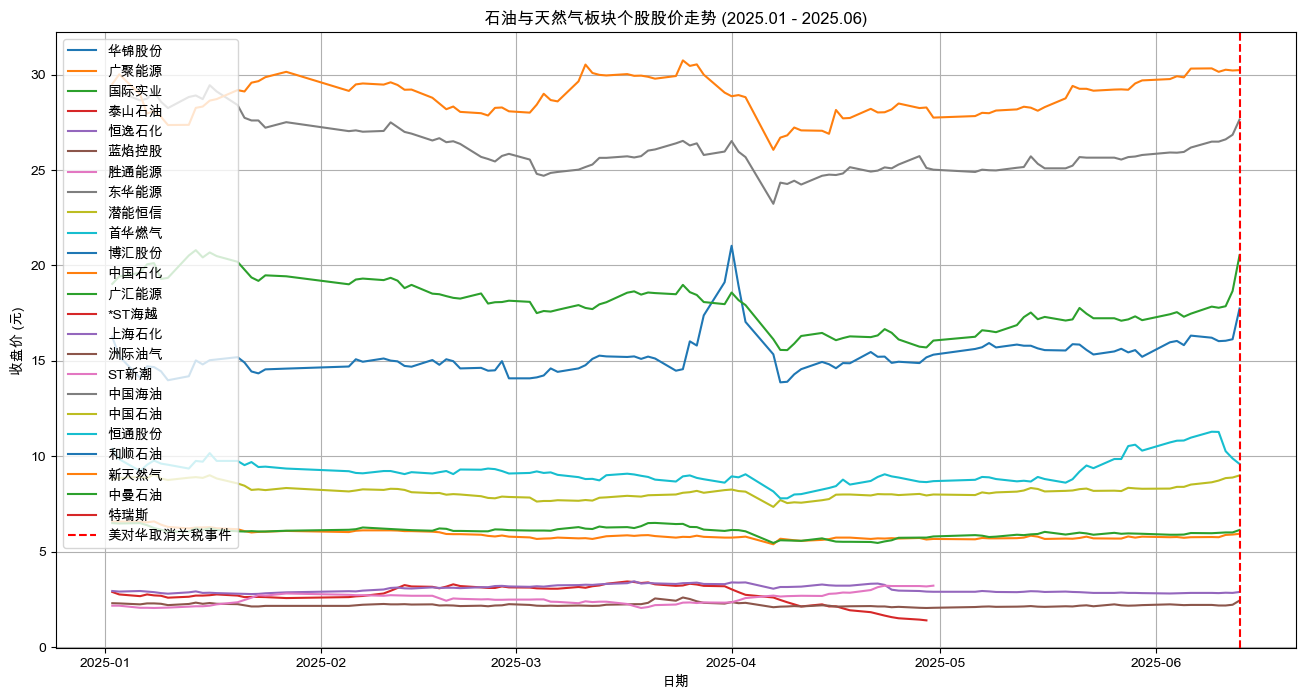

In [85]:
plt.figure(figsize=(16, 8))
for col in price_df.columns:
    sns.lineplot(data=price_df[col], label=col)
plt.axvline(pd.to_datetime('2025-06-13'), color='r', linestyle='--', label='美对华取消关税事件')
plt.title("石油与天然气板块个股股价走势 (2025.01 - 2025.06)")
plt.xlabel("日期")
plt.ylabel("收盘价 (元)")
plt.legend()
plt.grid(True)
#plt.tight_layout()
plt.show()

## 进行优化

In [61]:
big_gainers = []
# 定义时间窗口
start_date = '2025-05-13'
end_date = '2025-05-16'

for name, df in price_dfs.items():
    window_df = df[(df.index >= start_date) & (df.index <= end_date)]
    
    if len(window_df) < 2:
        print(f"{name} 在指定日期内数据不足")
        continue
    
    # 安全提取起始价和结束价（因为 window_df 是 DataFrame）
    start_price = window_df.iloc[0][name]
    end_price = window_df.iloc[-1][name]

    change = (end_price - start_price) / start_price * 100
    
    if change > 5:  # 设定涨幅阈值为 5%
        big_gainers.append((name, start_price, end_price, change))

# 转换为 DataFrame
gainers_df = pd.DataFrame(big_gainers, columns=['证券名称', '起始价', '结束价', '涨幅(%)'])
print("大涨股票：")
print(gainers_df)

盐田港 在指定日期内数据不足
珠海港 在指定日期内数据不足
北部湾港 在指定日期内数据不足
厦门港务 在指定日期内数据不足
招商港口 在指定日期内数据不足
南京港 在指定日期内数据不足
大涨股票：
  证券名称  起始价  结束价  涨幅(%)
0  连云港 5.59 7.45  33.27


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算相关性矩阵
corr_matrix = returns_df.corr()

# 排序相关性矩阵（使用聚类排序）
sns.clustermap(corr_matrix, cmap='coolwarm', annot=False, figsize=(10, 8))
plt.suptitle("港口股收益率相关性热力图", y=1.02)
plt.show()